<a href="https://colab.research.google.com/github/jfogarty/machine-learning-intro-workshop/blob/master/misc/data-explore-iris-data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data exploration - Iris Data Set

This example explores the [Iris Data Set](https://archive.ics.uci.edu/ml/datasets/iris) [[csv](https://github.com/venky14/Machine-Learning-with-Iris-Dataset/blob/master/Iris.csv)] from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) usings [Pandas Dataframes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).  This kind of [EDA]() (Exploratory Data Analysis) is one of the key data science components of machine learning applications.

<figure><br>
  <center><img src="../images/iris.jpg" /></center>
</figure>

Some of the example code here is pulled from the book [Neural Network Projects with Python](https://www.oreilly.com/library/view/neural-network-projects/9781789138900/) by James Loy. The majority is from the Github project [Machine Learning with Iris Dataset](https://github.com/venky14/Machine-Learning-with-Iris-Dataset) by [Veky Rathod](https://github.com/venky14)

## Data Set Information:

This is perhaps the best known dataset to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See [Duda & Hart](https://drive.google.com/open?id=1fq7usrZu7nmi0co5urq60h9P6w0WkDbY), for example.) 

- The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. 
- One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

- Predicted attribute: class of iris plant. 

- This is an exceedingly simple domain. 

## Attribute Information:

1. [sepal](https://en.wikipedia.org/wiki/Sepal) length in cm 
2. [sepal](https://en.wikipedia.org/wiki/Sepal) width in cm 
3. [petal](https://en.wikipedia.org/wiki/Petal) length in cm 
4. [petal](https://en.wikipedia.org/wiki/Petal) width in cm 
5. class: 
  - Iris Setosa 
  - Iris Versicolour 
  - Iris Virginica
  
 <figure>
  <img src="../images/iris-petal-sepal.jpg" align=”right”/>
</figure>


# Python code

**Usage NOTE!** Use `Shift+Enter` to step through this notebook, executing the code as you go.

In [2]:
#@title Welcome
import datetime
print(f"Welcome to exploring this notebook at {datetime.datetime.now()}! ")

Welcome to exploring this notebook at 2019-08-09 13:15:17.978958! 


In [3]:
import numpy as np #linear algebra
import pandas as pd # a data processing and CSV I/O library

import warnings # current version of seaborn generates a bunch of warnings that will be ignore
warnings.filterwarnings('ignore')

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [4]:
URL= 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

### Read the Iris Data set from the UC Irvine ML databases

In [5]:
colnames = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv(URL, names=colnames)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [12]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


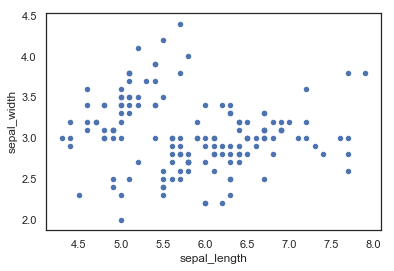

In [20]:
df.plot(kind='scatter',x='sepal_length', y='sepal_width') # use this to make a scatterplot of the Iris features.

## Read a CSV file with column headings from a local directory

In [8]:
# load Iris Flower dataset
iris = pd.read_csv('../data/Iris.csv')

In [13]:
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [14]:
iris['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


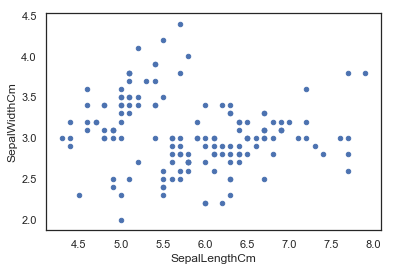

In [18]:
iris.plot(kind='scatter',x='SepalLengthCm', y='SepalWidthCm') # use this to make a scatterplot of the Iris features.

In [ ]:
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x='SepalLengthCm',y='SepalWidthCm', data=iris, size=5)

In [ ]:
iris.shape


In [ ]:
iris.info()

In [ ]:
# use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue = 'Species', size=5) \
    .map(plt.scatter, 'SepalLengthCm','SepalWidthCm') \
    .add_legend()

In [ ]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x='Species', y='PetalLengthCm', data=iris)

In [ ]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(data=iris, x = 'Species',y = 'PetalLengthCm')
ax = sns.stripplot(data=iris, x='Species', y='PetalLengthCm', jitter=True, edgecolor='green')

In [ ]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x='Species',y='PetalLengthCm', data=iris, size=6)   

In [ ]:
# A useful seaborn plot for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature

sns.FacetGrid(iris, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

In [ ]:
iris.head()

In [ ]:
sns.pairplot(iris.drop('Id', axis=1), hue='Species', size=3)

Another useful seaborn plot is the pairplot, which shows the bivariate relation
between each pair of features

From the pairplot, we'll see that the Iris-setosa species is separataed from the other
two across all feature combinations

In [ ]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde

sns.pairplot(iris.drop('Id', axis=1), hue='Species', size=3, diag_kind='kde')

In [ ]:
# make a boxplot with Pandas on each feature split out by species

iris.drop('Id', axis=1).boxplot(by='Species', figsize=(12,6))

In [ ]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
from pandas.tools.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species")

In [ ]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris.drop("Id", axis=1), "Species")

In [ ]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.tools.plotting import radviz
radviz(iris.drop("Id", axis=1), "Species")

In [ ]:
sns.factorplot('SepalLengthCm', data=iris, hue='Species', kind='count' )